In [1]:
import cutecharts.charts as cute
import pandas as pd
import numpy as np
import os

#exploring the dataset to see what we can use
books = pd.read_csv("datasets\children_books.csv")

print (f"There are {books['Title'].nunique()} unique books in the {books['Title'].count()} records.")
print("----------------------------")
print(books.info())

There are 41 unique books in the 3269 records.
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3269 non-null   object
 1   Author       3096 non-null   object
 2   Desc         3269 non-null   object
 3   Inerest_age  3269 non-null   object
 4   Reading_age  3269 non-null   object
dtypes: object(5)
memory usage: 127.8+ KB
None


It seems like there are only 41 unique books in the children books dataset despite having 3269 rows of data with some Author data missing.
Let's explore if the different unique books have have different meaningful data on the other columns. 

In [2]:
#I will use a few unique title to explore further
books['Title'].unique()

array(['The Girl Who Drank the Moon', 'Time Between Us',
       'Girl Out of Water', 'Captive', 'The School of Music',
       'The Crystal Stair', 'Dark Inside', 'Kite Spirit',
       'I Capture the Castle', 'Butter', 'Dead Jealous',
       'A Flash of Blue', 'Jet Black Heart', "The Sin Eater's Daughter",
       'King Lear - Manga Shakespeare', 'Frankenstein',
       'The Song from Somewhere Else', "Amy & Roger's Epic Detour",
       'The Changes Trilogy', 'The Train to Impossible Places',
       'Half Brother', 'Holding Up the Universe', 'Pop-Up Frankenstein',
       'Mister Creecher', 'The Complete Calvin and Hobbes',
       "Don't Pick on Me!", 'Five Hundred Miles', 'Rules for a Knight',
       'Paper Avalanche', 'Ghost World', 'Invictus',
       'The Name of the Star', 'Spy for the Queen of Scots',
       'Jimmy Corrigan:', 'The Martian Girl', 'Buffalo Soldier',
       'Witchstruck', 'Flyaway', 'Etiquette and Espionage',
       'The Sky is Everywhere', 'Glass Sword'], dtype=object)

In [3]:
example_one = books[books['Title']=='Time Between Us']
example_one

,Title,Author,Desc,Inerest_age,Reading_age
1,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
38,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
75,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
112,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
158,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
...,...,...,...,...,...
3088,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
3123,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
3160,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
3197,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+


In [4]:
example_two = books[books['Title']=='Butter']
example_two

,Title,Author,Desc,Inerest_age,Reading_age
9,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
46,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
83,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
120,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
166,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
...,...,...,...,...,...
3095,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
3131,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
3168,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+
3205,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+


In [5]:
example_three = books[books['Title']=='The Train to Impossible Places']
example_three

,Title,Author,Desc,Inerest_age,Reading_age
19,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
56,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
93,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
130,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
176,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
...,...,...,...,...,...
3105,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
3141,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
3178,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12
3215,The Train to Impossible Places,P.G. Bell Illustrator: Flavia Sorrentino,Suzy Smith is very surprised when a huge magic...,10-12,10-12


Upon exploring 3 examples, the titles are repeated with all the the other columns having no unique value.
Thus having multiple repeated rows is not meaningful.
I will now proceed to keep only those that are unique.

In [6]:
#to drop the books with no Author data
books.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

books

,Title,Author,Desc,Inerest_age,Reading_age
0,The Girl Who Drank the Moon,Kelly Barnhill,"Every year, the evil Protectorate offers a bab...",10-14,10-14
1,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
2,Girl Out of Water,Nat Luurtsema,Lou Brown's swimming ambitions sank without tr...,13-18,10+
3,Captive,A J Grainger,Robyn is scared. Ever since the attempted assa...,13+,13
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,Welcome to the School of Music. In charge is M...,10+,10+
5,The Crystal Stair,Catherine Fisher,The Crystal Stair picks up after At the World’...,12+,8+
6,Dark Inside,Jeyn Roberts,After a huge earthquake strikes every continen...,14+,10+
7,Kite Spirit,Sita Brahmachari,"When her best friend Dawn commits suicide, Kit...",13+,12+
8,I Capture the Castle,Dodie Smith,"Originally published in 1949, this delightful ...",12+,12+
9,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+


In [7]:
books.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

books.reset_index(drop=True, inplace=True)
books

,Title,Author,Desc,Inerest_age,Reading_age
0,The Girl Who Drank the Moon,Kelly Barnhill,"Every year, the evil Protectorate offers a bab...",10-14,10-14
1,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
2,Girl Out of Water,Nat Luurtsema,Lou Brown's swimming ambitions sank without tr...,13-18,10+
3,Captive,A J Grainger,Robyn is scared. Ever since the attempted assa...,13+,13
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,Welcome to the School of Music. In charge is M...,10+,10+
5,The Crystal Stair,Catherine Fisher,The Crystal Stair picks up after At the World’...,12+,8+
6,Dark Inside,Jeyn Roberts,After a huge earthquake strikes every continen...,14+,10+
7,Kite Spirit,Sita Brahmachari,"When her best friend Dawn commits suicide, Kit...",13+,12+
8,I Capture the Castle,Dodie Smith,"Originally published in 1949, this delightful ...",12+,12+
9,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+


This means I only have 39 Book titles to work with. I will set this aside and explore the other dataset first.

In [8]:
stories = pd.read_csv("datasets\children_stories.csv", encoding = "ISO-8859-1")

print (f"There are {stories['names'].nunique()} unique book names in the {stories['names'].count()} records.")
print("----------------------------")
print(stories.info())

There are 390 unique book names in the 430 records.
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   430 non-null    object
 1   cats    430 non-null    object
 2   desc    430 non-null    object
dtypes: object(3)
memory usage: 10.2+ KB
None


There are more to work with on the Children stories dataset.
Again, there are 390 unique values out of 430 records. 
Let's see if there are meaningful or duplicated data.

In [9]:
duplicated_stories = stories[stories['names'].duplicated()]
duplicated_stories.sort_values(by=['names'])


,names,cats,desc
211,Alfie Gives a Hand,Age 3+,Shirley Hughes' much-loved Alfie goes to his f...
152,Alfie Outdoors,Age 3+,One sunny day Alfie decides to explore the bot...
207,Baby's Bathtime,Age 0+,"Bold, colourful and great fun, this simple and..."
197,Do You Want To Be My Friend?,Age 3+,'Do you want to be my friend?' Asked just once...
187,Elmer and the Lost Teddy,Age 0+,When Baby Elephant loses his teddy and can't s...
195,Elmer's Friends,Age 0+,A colourful board book in which the ever-popul...
149,Father Christmas,Age 2+,It's December 24th. But for poor Father Christ...
190,From Acorn to Zoo,Age 2+,"This is an alphabet book with a difference, in..."
169,Horton Hears a Who!,Age 3+,"Now a major film, Horton Hears a Who! is a hil..."
130,Hug,Age 0+,Bobo the chimp wanders sadly around the jungle...


From the above, its observed that some stories are duplicated with the similar cats and same desc values, with a few just with similar stories name such as "Nursery Rhymes" and "The Snowman".
Before removing the duplicated rows, I would like to explore further on the cats column.

In [10]:
print(f"There are {stories['cats'].nunique()} unique categories")
print("----------------------------")
print(stories['cats'].unique())

There are 59 unique categories
----------------------------
['Age 2-9' 'Age 1-2' 'Age 1-3' 'Age 0-2' 'Age  0-3' 'Age 0-3' 'Age 3-5'
 'Age 0+' 'Age 1-5' 'Age 1-4' 'Age 2-6' 'Age 2-7' 'Age 3-6' 'Age 0-4'
 'Age 2-5' 'Age 4-6' 'Age 0-5' 'Age 2+' 'Age 4+' 'Age 3+' 'Age 3-7'
 'Age 3-4' 'Age 1-6' 'Age 0-6' 'Age 4-7' 'Age 5-8' 'Age 1+' 'Age 5+'
 'Age 4-11' 'Age 2-4' 'Age 4-5' 'Age 4-8' 'Age 6months+' 'Age 6-8'
 'Age 6-11' 'Age 8-12' 'Age 7-10' 'Age 7-12' 'Age 7+' 'Age 5-9' 'Age 6+'
 'Age 7-9' 'Age 8+' 'Age 7-11' 'Age 6-9' 'Age 9-14' 'Age 9-11' 'Age 9+'
 'Age 10+' 'Age 11+' 'Age 13+' 'Age 12+' 'Age ' 'Age 9-13' 'Age 11-14'
 'Age 10-14' 'Age 9-12' 'Age 8-11' 'Age 11-15']


Seeing how there are 59 unique categories, the cats column needs to be cleaned up and categorized accordingly.
I have deviced to go with the guide on https://www.healthychildren.org/English/ages-stages/Pages/default.aspx
where I would then categorize the age groups according to the appropriate stage as follows:
Baby: 0-1 year
Toddler: 1-3 years
Preschool: 3-5 years
Gradeschooler: 5-12 years
Teen: 12-18 years

As there are some age gaps in between, I will take account of the start age and merge Baby and Toddler category into just Toddler.
My Stages column would look like:
Toddler: 0-3 years
Preschool: 3-5 years
Gradeschooler: 5-12 years
Teen: 12-18 years

In [11]:
groups = {'toddler' : ['Age 1-2','Age 1-3','Age 0-2','Age  0-3','Age 0-3','Age 0+', 
              'Age 0-4', 'Age 0-5', 'Age 2+', 'Age 3+','Age 1+','Age 6months+'],
'preschool': ['Age 3-5','Age 1-5','Age 1-4','Age 2-6','Age 3-6','Age 2-5',
                'Age 4-6','Age 4+','Age 3-4','Age 1-6','Age 0-6','Age 2-4','Age 4-5'],
'gradeschool' : ['Age 2-9','Age 2-7','Age 3-7','Age 4-7','Age 5-8','Age 5+', 'Age 4-11'  
                    'Age 4-8','Age 6-8','Age 6-11','Age 8-12','Age 7-10','Age 7-12','Age 7+',
                    'Age 5-9','Age 6+','Age 7-9','Age 8+','Age 7-11','Age 6-9','Age 9-14',
                    'Age 9-11','Age 9+','Age 10+','Age 11+','Age 9-12','Age 8-11'],
'teens': ['Age 13+','Age 12+','Age 9-13','Age 11-14','Age 10-14','Age 11-15'],
}
stories["Stage"] = (stories["cats"]
    .apply(lambda x: [key for key in groups.keys() if x in groups[key]])
    .str[0]
    .fillna("allages")
)

In [12]:
stories['Stage'].value_counts()

gradeschool    227
toddler        105
preschool       72
teens           20
allages          6
Name: Stage, dtype: int64

Now that we have the ages categorized according to stages, I return to look at the duplicated stories. I want to remove all the duplicated stories with the same description.

In [13]:
stories.drop_duplicates(subset='desc', inplace=True)

In [14]:
#running this again to see what is left that is duplicated
duplicated_stories = stories[stories['desc'].duplicated()]
duplicated_stories.count()

names    0
cats     0
desc     0
Stage    0
dtype: int64

After performing the above, only stories with the same name but different description remains.

In [15]:
#see total rows in the cleaned dataframe
len(stories.index)

393

In [16]:
#renaming columns for clarity
stories.rename(columns={"names": "Title", "cats": "Age Category", "desc":"Description"}, inplace=True)

In [17]:
stories

,Title,Age Category,Description,Stage
0,HIDE AND SEEK,Age 2-9,Was it just another game of hide and seek? No....,gradeschool
1,GINGER THE GIRAFFE,Age 2-9,Read this warm tale of camaraderie and affecti...,gradeschool
2,DOING MY CHORES,Age 2-9,Love shines through this great illustrated kid...,gradeschool
3,ABE THE SERVICE DOG,Age 2-9,Abe was a real Service Dog who dedicated his l...,gradeschool
4,SUNNY MEADOWS WOODLAND SCHOOL,Age 2-9,The class took a little train and went deep in...,gradeschool
...,...,...,...,...
425,Carrying the Elephant: A Memoir of Love and Loss,Age 11+,In the 72 prose poems that make up this unusua...,gradeschool
426,War and Peas,Age 8+,Nearly forty years after its original appearan...,gradeschool
427,Love that Dog,Age 9-12,"Jack has a great sadness in his life, but he i...",gradeschool
428,A Pilgrim's Progress,Age 9+,'I had a dream last night ... large enough to ...,gradeschool


In [18]:
#revisiting the dataset - books
books

,Title,Author,Desc,Inerest_age,Reading_age
0,The Girl Who Drank the Moon,Kelly Barnhill,"Every year, the evil Protectorate offers a bab...",10-14,10-14
1,Time Between Us,Tamara Ireland Stone,Sixteen-year-old Anna is struggling to underst...,13+,12+
2,Girl Out of Water,Nat Luurtsema,Lou Brown's swimming ambitions sank without tr...,13-18,10+
3,Captive,A J Grainger,Robyn is scared. Ever since the attempted assa...,13+,13
4,The School of Music,Rachel Bowen and Meurig Bowen Illustrator: Dan...,Welcome to the School of Music. In charge is M...,10+,10+
5,The Crystal Stair,Catherine Fisher,The Crystal Stair picks up after At the World’...,12+,8+
6,Dark Inside,Jeyn Roberts,After a huge earthquake strikes every continen...,14+,10+
7,Kite Spirit,Sita Brahmachari,"When her best friend Dawn commits suicide, Kit...",13+,12+
8,I Capture the Castle,Dodie Smith,"Originally published in 1949, this delightful ...",12+,12+
9,Butter,Erin Jade Lange,"Isolated and bullied at school, with a dysfunc...",13+,13+


The books dataset can later be used for Test data. I will set this aside again to first visualise the stories dataset and prepare it for machine learning.

In [19]:
#creating a wordcloud, importing dependencies
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [20]:
#test with 1 row of data
text = stories['Description'][0]
text

'Was it just another game of hide and seek? No. It was not. First she fell into a deep, dark hole in the ground and then they found a treasure. Did it end there? No! It did not. Read more about this thrilling adventure of Sally and friends in this free illustrated kidsâ\x80\x99 book. The fun never ends when Sallyâ\x80\x99s around! '

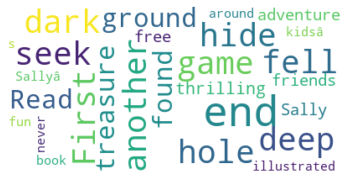

In [21]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
alltext = " ".join(desc for desc in stories.Description)
print ("There are a total of {} words in the combined descriptions.".format(len(alltext)))

There are a total of 240261 words in the combined descriptions.


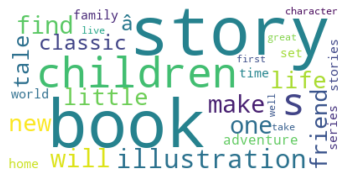

In [23]:
wordcloud = WordCloud(max_font_size=80, max_words=30, background_color="white").generate(alltext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

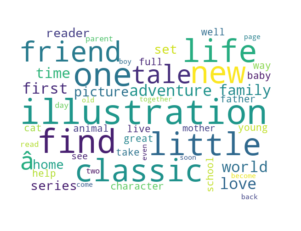

In [24]:
#upon looking at the word cloud, it looks like I need some stopwords

#stopword list
stopwords = set(STOPWORDS)
stopwords.update(["S","story", "stories", "children", "book","books", "will", "make"])
mask = np.array(Image.open("images/storybook.jpg"))
wordcloud = WordCloud(stopwords=stopwords, max_font_size=80, max_words=50, 
                      background_color="white", mask=mask).generate(alltext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#clean the combined text to get the word frequencies
for char in '\x80\x99\x9d\x92\x93\x96\x98\x9c!â?-.,:)(;\n':
    alltext=alltext.replace(char,'')

alltext = alltext.lower()
alltext

'was it just another game of hide and seek no it was not first she fell into a deep dark hole in the ground and then they found a treasure did it end there no it did not read more about this thrilling adventure of sally and friends in this free illustrated kids book the fun never ends when sallys around  read this warm tale of camaraderie and affection set in the wild and beautiful savannah in our free illustrated kid\'s book ginger the giraffe uses her long neck to save the other animals from the blazing forest fire follow them in their jungle paths as they all meet with yet another adventure   love shines through this great illustrated kids book  read how a little girl makes chores fun and easy to do a  fantastic addition to your little ones free bed time story collection  abe was a real service dog who dedicated his life assisting bj a good family friend service dogs are smart well trained well behaved dedicated and committed to ensuring their master is safe this book is intended to

In [26]:
word_list = alltext.split()
word_list

['was',
 'it',
 'just',
 'another',
 'game',
 'of',
 'hide',
 'and',
 'seek',
 'no',
 'it',
 'was',
 'not',
 'first',
 'she',
 'fell',
 'into',
 'a',
 'deep',
 'dark',
 'hole',
 'in',
 'the',
 'ground',
 'and',
 'then',
 'they',
 'found',
 'a',
 'treasure',
 'did',
 'it',
 'end',
 'there',
 'no',
 'it',
 'did',
 'not',
 'read',
 'more',
 'about',
 'this',
 'thrilling',
 'adventure',
 'of',
 'sally',
 'and',
 'friends',
 'in',
 'this',
 'free',
 'illustrated',
 'kids',
 'book',
 'the',
 'fun',
 'never',
 'ends',
 'when',
 'sallys',
 'around',
 'read',
 'this',
 'warm',
 'tale',
 'of',
 'camaraderie',
 'and',
 'affection',
 'set',
 'in',
 'the',
 'wild',
 'and',
 'beautiful',
 'savannah',
 'in',
 'our',
 'free',
 'illustrated',
 "kid's",
 'book',
 'ginger',
 'the',
 'giraffe',
 'uses',
 'her',
 'long',
 'neck',
 'to',
 'save',
 'the',
 'other',
 'animals',
 'from',
 'the',
 'blazing',
 'forest',
 'fire',
 'follow',
 'them',
 'in',
 'their',
 'jungle',
 'paths',
 'as',
 'they',
 'all',
 '

In [27]:
#use Counter to count most common words
from collections import Counter
Counter(word_list).most_common()

[('the', 2238),
 ('and', 1600),
 ('a', 1335),
 ('of', 1126),
 ('to', 1103),
 ('is', 760),
 ('in', 695),
 ('with', 400),
 ('his', 395),
 ('for', 336),
 ('this', 333),
 ('he', 285),
 ('her', 275),
 ('but', 257),
 ('that', 255),
 ('are', 225),
 ('from', 224),
 ('as', 217),
 ('on', 212),
 ('book', 209),
 ('an', 206),
 ('story', 200),
 ('will', 194),
 ('she', 181),
 ('it', 179),
 ('by', 177),
 ('they', 171),
 ('their', 168),
 ('has', 163),
 ('all', 157),
 ('when', 151),
 ('children', 139),
 ('who', 133),
 ('be', 127),
 ('at', 126),
 ('which', 117),
 ('about', 116),
 ('little', 114),
 ('illustrations', 105),
 ('one', 100),
 ('him', 99),
 ('up', 98),
 ('new', 97),
 ('into', 96),
 ('life', 90),
 ('have', 90),
 ('classic', 89),
 ('out', 84),
 ('young', 84),
 ('first', 73),
 ('them', 73),
 ('not', 71),
 ('or', 70),
 ('readers', 65),
 ('so', 65),
 ('make', 63),
 ('can', 62),
 ('family', 61),
 ('stories', 60),
 ('also', 60),
 ('was', 59),
 ('tale', 58),
 ('its', 57),
 ('world', 57),
 ('series', 57

Seeing how the Most used words are those that does not provide much meaning('the','and', 'of'...) and those that may not be relevant ('book', 'books', 'story'), I will have to get rid of them. 

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

common= stopwords.words('english')
more_stopwords = ["'","'s", "story", "stories", "children", "book","books"]
for w in more_stopwords:
    common.append(w)

text_tokens = word_tokenize(alltext)

wordlist_withoutSW = [word for word in text_tokens if not word in common]

print(wordlist_withoutSW)

['another', 'game', 'hide', 'seek', 'first', 'fell', 'deep', 'dark', 'hole', 'ground', 'found', 'treasure', 'end', 'read', 'thrilling', 'adventure', 'sally', 'friends', 'free', 'illustrated', 'kids', 'fun', 'never', 'ends', 'sallys', 'around', 'read', 'warm', 'tale', 'camaraderie', 'affection', 'set', 'wild', 'beautiful', 'savannah', 'free', 'illustrated', 'kid', 'ginger', 'giraffe', 'uses', 'long', 'neck', 'save', 'animals', 'blazing', 'forest', 'fire', 'follow', 'jungle', 'paths', 'meet', 'yet', 'another', 'adventure', 'love', 'shines', 'great', 'illustrated', 'kids', 'read', 'little', 'girl', 'makes', 'chores', 'fun', 'easy', 'fantastic', 'addition', 'little', 'ones', 'free', 'bed', 'time', 'collection', 'abe', 'real', 'service', 'dog', 'dedicated', 'life', 'assisting', 'bj', 'good', 'family', 'friend', 'service', 'dogs', 'smart', 'well', 'trained', 'well', 'behaved', 'dedicated', 'committed', 'ensuring', 'master', 'safe', 'intended', 'bring', 'awareness', 'importance', 'early', 're

In [62]:
#recount words after removing stopwords
counted = Counter(wordlist_withoutSW).most_common()

('insecurity', 1)

In [81]:
freq_used_words_df = pd.DataFrame(counted)
freq_used_words_df.rename(columns={0:"Words", 1:"Count"}, inplace=True)
freq_used_words_df.head(10)

,Words,Count
0,little,114
1,illustrations,105
2,one,102
3,new,97
4,life,94
5,classic,89
6,young,84
7,first,73
8,family,66
9,readers,66
